### Uppgift 3 - KPIer & explorativ dataanalys ###

Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på flera
sheets på båda Excel-filerna.Se till att dokumentera vad du undersöker med markdown kombinerad med
kod i Jupyter notebook eller om du använder Pythonskript, skriv en markdown vid sidan om. Dokumentera
också vad du kommer fram till och spara alla visualiseringar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### KPI 1 - Andel Vaccinerade Män / Kvinnor ###

In [2]:
covid_vaccine = pd.read_excel(
    "Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", "Vaccinerade kön"
)

covid_deaths_per_day = pd.read_excel(
    "Data/Folkhalsomyndigheten_Covid19.xlsx", "Antal avlidna per dag"
)

covid_total_deaths = pd.read_excel(
    "Data/Folkhalsomyndigheten_Covid19.xlsx", "Totalt antal per kön"
)

In [3]:
covid_vaccine

,Kön,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus
0,Totalt,7810380,0.858964,Minst 1 dos
1,Totalt,7627588,0.838861,Minst 2 doser
2,Män,3858688,0.845743,Minst 1 dos
3,Män,3759898,0.824090,Minst 2 doser
4,Kvinnor,3951692,0.872279,Minst 1 dos
5,Kvinnor,3867690,0.853737,Minst 2 doser


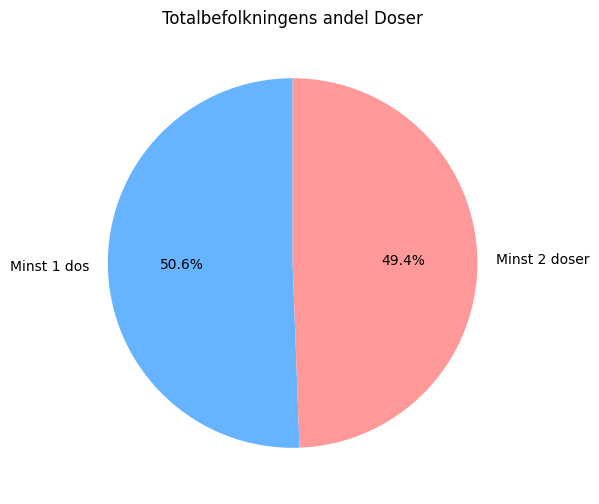

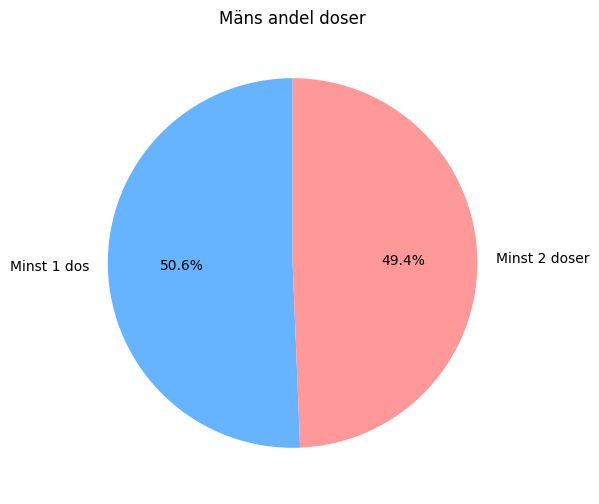

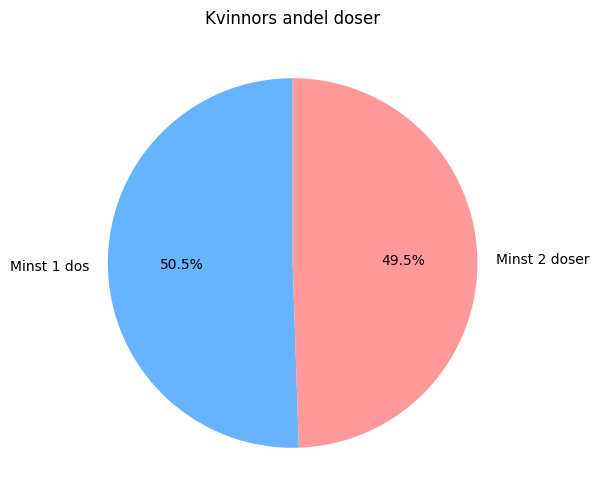

In [4]:
pivot = covid_vaccine.pivot_table(
    values="Andel vaccinerade", index="Kön", columns="Vaccinationsstatus", aggfunc="sum"
)

total_vaccinated = pivot.loc["Totalt"]
total_share = [total_vaccinated["Minst 1 dos"], total_vaccinated["Minst 2 doser"]]

plot_names = [
    "totalbefolkningens_andel_doser",
    "mans_andel_doser",  # <-- I want to avoid åäö
    "kvinnors_andel_doser",
]

# PLOT 1
############################################################

fig1 = plt.figure(figsize=(8, 6))

ax1 = fig1.add_subplot(111)
ax1.pie(
    total_share,
    labels=total_vaccinated.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66b3ff", "#ff9999"],
)
ax1.set_title("Totalbefolkningens andel Doser")
ax1.set_frame_on(False)


plt.savefig(f"Visualiseringar/KPI_plots/{plot_names[0]}.jpg")
plt.show()
plt.close(fig1)

# PLOT 2
############################################################

men_vaccinated = pivot.loc["Män"]
men_share = [men_vaccinated["Minst 1 dos"], men_vaccinated["Minst 2 doser"]]

fig2 = plt.figure(figsize=(8, 6))

ax2 = fig2.add_subplot(111)
ax2.pie(
    men_share,
    labels=men_vaccinated.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66b3ff", "#ff9999"],
)
ax2.set_title("Mäns andel doser")
ax2.set_frame_on(False)

plt.savefig(f"Visualiseringar/KPI_plots/{plot_names[1]}.jpg")
plt.show()
plt.close(fig2)

# PLOT 3
############################################################

women_vaccinated = pivot.loc["Kvinnor"]
women_share = [women_vaccinated["Minst 1 dos"], women_vaccinated["Minst 2 doser"]]

fig3 = plt.figure(figsize=(8, 6))

ax3 = fig3.add_subplot(111)
ax3.pie(
    women_share,
    labels=women_vaccinated.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66b3ff", "#ff9999"],
)
ax3.set_title("Kvinnors andel doser")
ax3.set_frame_on(False)


plt.savefig(f"Visualiseringar/KPI_plots/{plot_names[2]}.jpg")
plt.show()
plt.close(fig3)

In [5]:
covid_deaths_per_day

,Datum_avliden,Antal_avlidna
0,2020-03-11 00:00:00,1
1,2020-03-12 00:00:00,0
2,2020-03-13 00:00:00,1
3,2020-03-14 00:00:00,1
4,2020-03-15 00:00:00,2
...,...,...
956,2022-10-23 00:00:00,4
957,2022-10-24 00:00:00,0
958,2022-10-25 00:00:00,1
959,2022-10-26 00:00:00,0


In [6]:
covid_total_deaths

,Kön,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Man,1210098,6550,11279
1,Kvinna,1381189,2947,9273
2,Uppgift saknas,20293,47,107


### KPI 2 - Andel avlidna av de som blivit smittade per kön ###

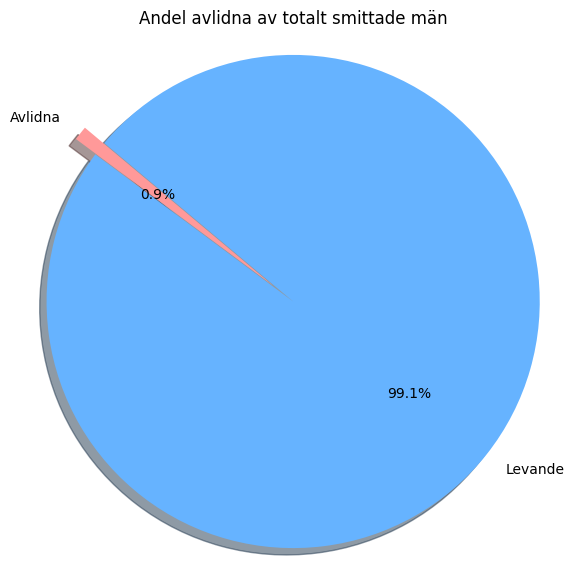

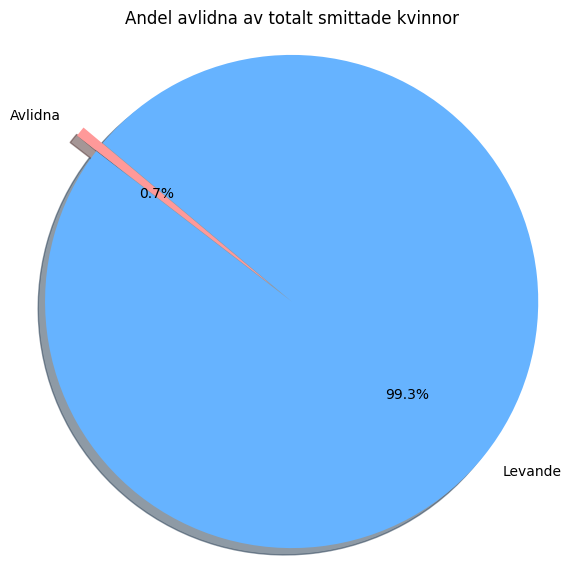

In [7]:
def plot_pie_for_gender(gender_data, gender, output_name):
    total_cases = gender_data["Totalt_antal_fall"].sum()
    total_deaths = gender_data["Totalt_antal_avlidna"].sum()

    death_percentage = (total_deaths / total_cases) * 100
    survival_percentage = 100 - death_percentage

    labels = ["Avlidna", "Levande"]
    sizes = [death_percentage, survival_percentage]
    colors = ["#ff9999", "#66b3ff"]
    explode = (0.1, 0)

    plt.figure(figsize=(7, 7))
    plt.pie(
        sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        shadow=True,
        startangle=140,
    )
    plt.title(f"Andel avlidna av totalt smittade {gender}")
    plt.axis("equal")
    plt.savefig(f"Visualiseringar/KPI_plots/{output_name}.jpg")
    plt.show()


gender_data_men = covid_total_deaths[covid_total_deaths['Kön'] == 'Man']
gender_data_women = covid_total_deaths[covid_total_deaths['Kön'] == 'Kvinna']

plot_pie_for_gender(gender_data_men, "män", "man")
plot_pie_for_gender(gender_data_women, "kvinnor", "kvinnor")

### KPI 3 - Antal dödsfall över tid ###

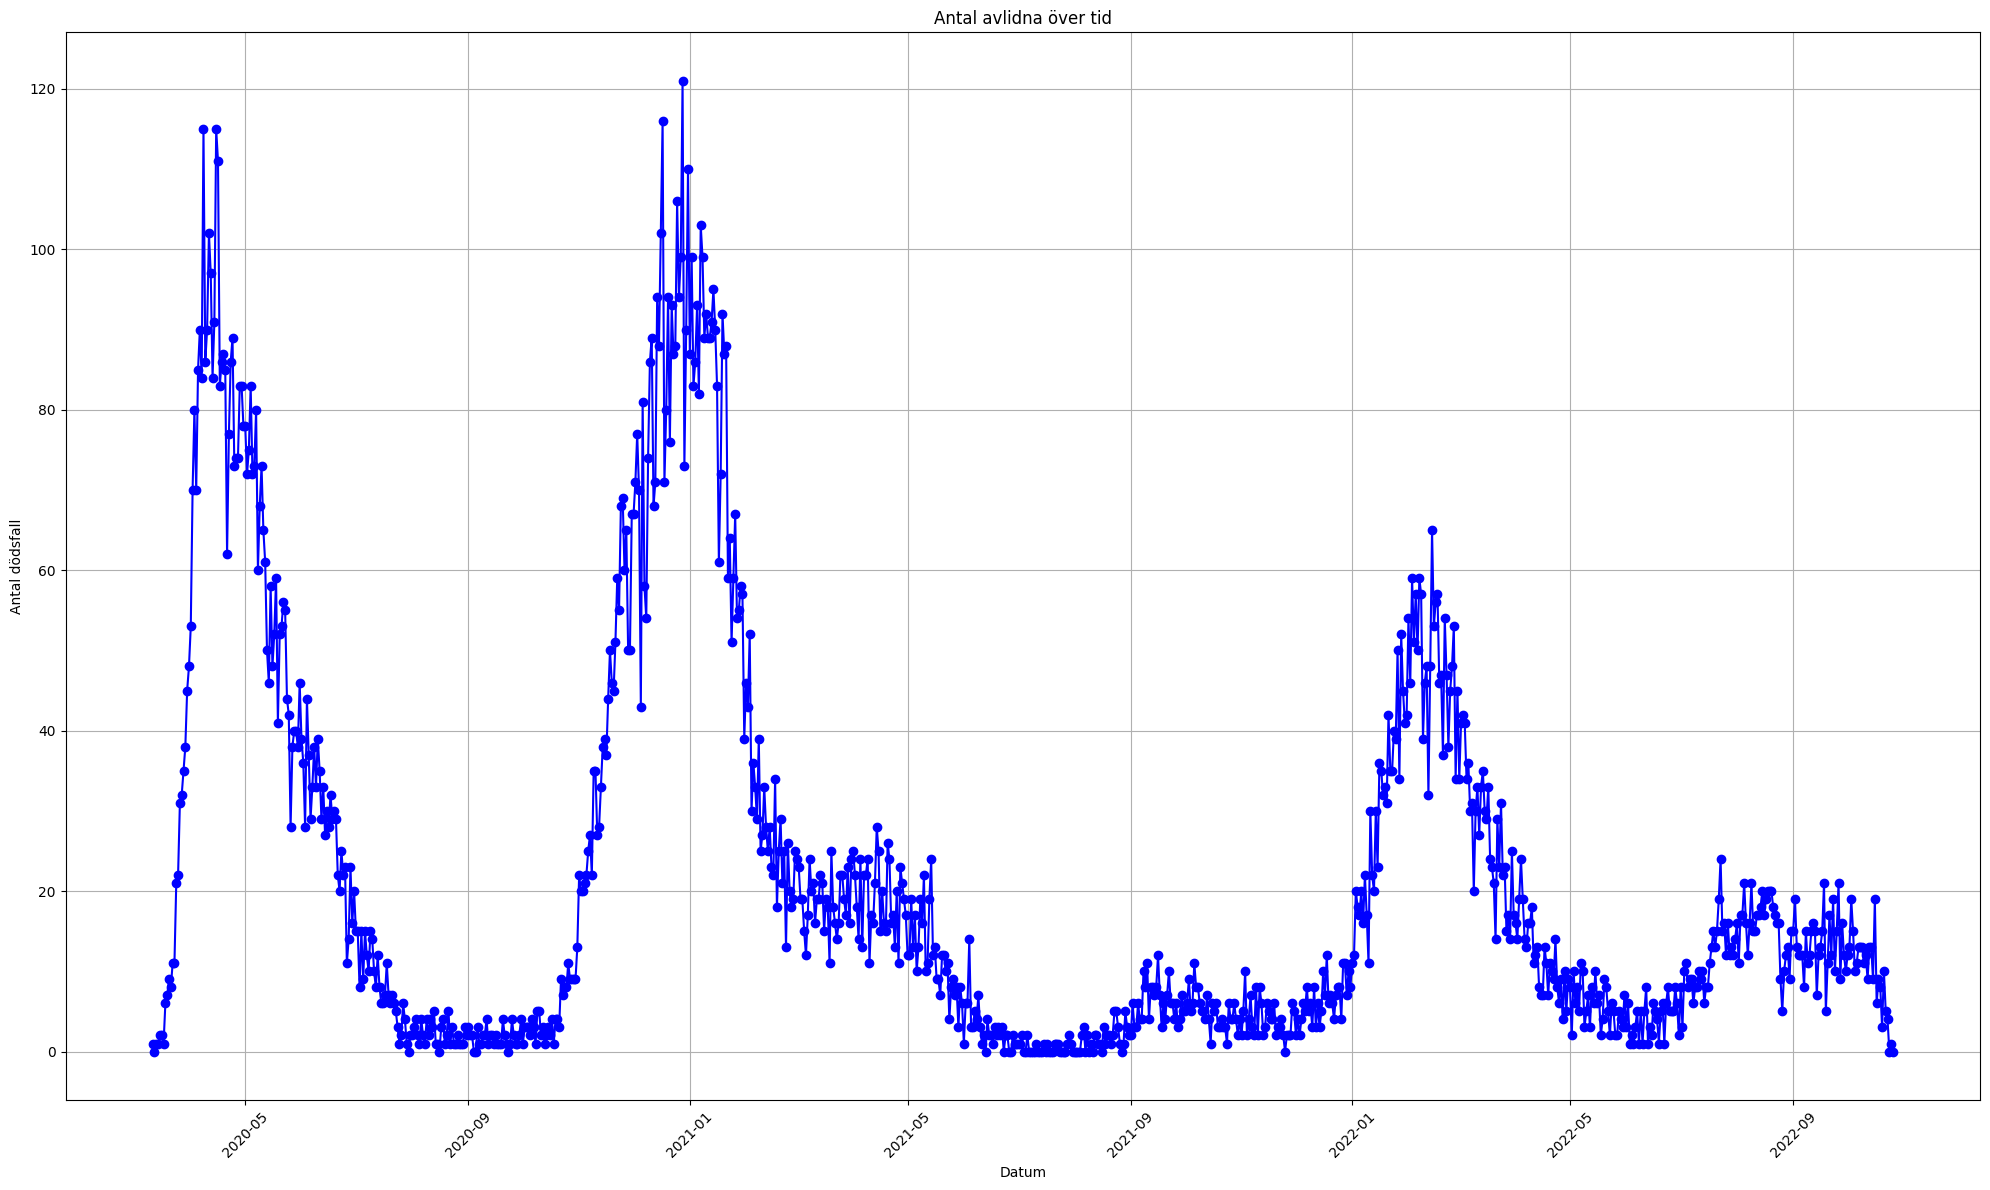

In [8]:
covid_deaths_per_day["Datum_avliden"] = pd.to_datetime(
    covid_deaths_per_day["Datum_avliden"], errors="coerce"
)

covid_deaths_per_day = covid_deaths_per_day.dropna(subset=["Datum_avliden"])

covid_deaths_per_day = covid_deaths_per_day.reset_index(drop=True)

plt.figure(figsize=(20, 12))
plt.plot(
    covid_deaths_per_day["Datum_avliden"],
    covid_deaths_per_day["Antal_avlidna"],
    marker="o",
    linestyle="-",
    color="b",
)
plt.title("Antal avlidna över tid")
plt.xlabel("Datum")
plt.ylabel("Antal dödsfall")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.savefig(f"Visualiseringar/KPI_plots/death_plot.jpg")
plt.show()